In [107]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector


In [5]:

concrete_compressive_strength = fetch_ucirepo(id=165)
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)


In [13]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2_score(y_test, y_pred)

0.576333587787164

In [31]:
arr = np.linspace(0.000001, 10, 20)
out = []
def temp(alp):
    lasso = Lasso(alpha = alp)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    # print(r2_score(y_test, y_pred))
    out.append(r2_score(y_test, y_pred))
    

for i in arr:
    temp(i/100)


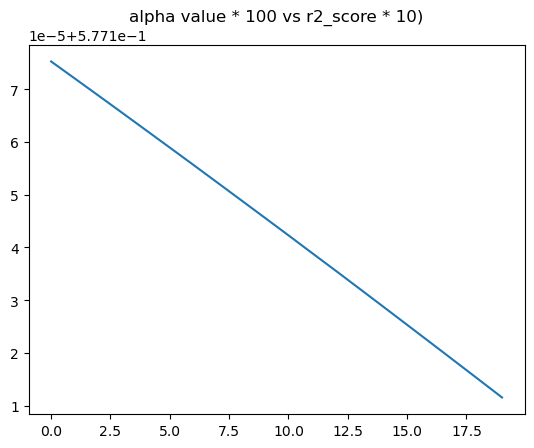

In [33]:
plt.plot(out)
plt.title("alpha value * 100 vs r2_score * 10)")
plt.show()

In [35]:

np.argmax(out), arr[np.argmax(out)]

(0, 1e-06)

Elastic Net regression

hyper param : alpha, l1_ratio (r) 0 < l1_ratio <= 1
params = b0, b1, b2, .....

when l1_ratio == 1:
it is equal to Lasso

# Elastic Net 

In [40]:
elnet = ElasticNet()
elnet.fit(X_train, y_train)
y_pred = elnet.predict(X_test)
r2_score(y_test, y_pred)

0.5766806310401154

In [84]:
arr = np.linspace(0.000001, 10, 20)
arr2 = np.linspace(0.000001, 1, 20)
scores = pd.DataFrame(columns = ['alpha', 'l1score', 'score'])
def temp(alp, l1scr):
    global scores
    elnet = ElasticNet(alpha = alp)
    elnet.fit(X_train, y_train)
    y_pred = elnet.predict(X_test)
    # print(r2_score(y_test, y_pred))
    scores = pd.concat([scores, pd.DataFrame(np.array([alp, l1scr, r2_score(y_test, y_pred)]))])

for i in arr:
    for j in arr2:
        temp(i, j)


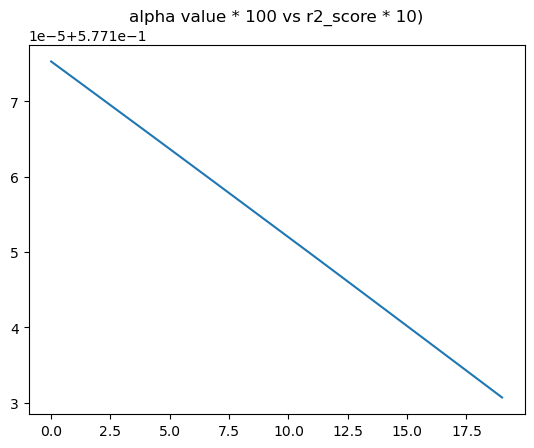

In [44]:
plt.plot(out)
plt.title("alpha value * 100 vs r2_score * 10)")
plt.show()

In [86]:

scores

,alpha,l1score,score,0
0,NaN,NaN,NaN,0.000001
1,NaN,NaN,NaN,0.000001
2,NaN,NaN,NaN,0.577175
0,NaN,NaN,NaN,0.000001
1,NaN,NaN,NaN,0.052633
...,...,...,...,...
1,NaN,NaN,NaN,0.947368
2,NaN,NaN,NaN,0.572264
0,NaN,NaN,NaN,10.000000
1,NaN,NaN,NaN,1.000000


# Housing dataset

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
housing = pd.read_csv("Housing.csv")

In [95]:
X = housing.drop('price', axis = 'columns')
y = housing['price']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, test_size = 0.3)

In [109]:
arr1 = np.linspace(0.0001, 10, 20)
arr2 = np.linspace(0.0002, 1, 10)

score_arr = [[], [], []]
def temp(alp, l1):
    # One hot encoder object
    ohe = OneHotEncoder(
        sparse_output= False,
        drop = 'first',
    ).set_output(transform = "pandas")
    
    # Column Transformer for one hot encoding 
    ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude = object)), 
                                 (ohe, make_column_selector(dtype_include = object)),
                                 verbose_feature_names_out = False
                                ).set_output(transform = "pandas")
    
    # Linear regressor object
    elas = ElasticNet(alpha = alp, l1_ratio = l1)
    
    pipe = Pipeline([("TRNS", ct),("ELAS", elas)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scor = r2_score(y_test, y_pred)
    score_arr[0].append(alp)
    score_arr[1].append(l1)
    score_arr[2].append(scor)

for i in arr1:
    for j in arr2:
        temp(i, j)


In [115]:
temp = pd.DataFrame(data = np.array(score_arr).T, columns = ["alpha", "l1ratio", "r2_score"])

In [121]:
temp.sort_values(by = "r2_score", ascending = False)

,alpha,l1ratio,r2_score
9,0.000100,1.000000,0.624686
8,0.000100,0.888911,0.624684
7,0.000100,0.777822,0.624682
19,0.526411,1.000000,0.624680
6,0.000100,0.666733,0.624680
...,...,...,...
181,9.473689,0.111289,0.266479
191,10.000000,0.111289,0.263798
170,8.947379,0.000200,0.263492
180,9.473689,0.000200,0.260786
